# Exploratory data analysis

This notebook aims to familiarize with the dataset through the following steps:

- **Data preparation:** cleaning, handling missing values, and data formatting
- **Exploratory data analysis (EDA):** visualizations, identifying patterns

These steps provide a deeper understanding of the dataset before proceeding to predictive modeling.


In [1]:
# basic imports
import os
import re
import numpy as np
import pandas as pd

#Code
# from typing import List

# figures
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline 
# import matplotlib.pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud

# disable warnings for libraries
# import warnings
# warnings.filterwarnings("ignore")

# configure logger
import logging

from data_processing import EmbeddingLoader, MovieReviewsProcessor, DataVisualizer


In [2]:
emb_loader = EmbeddingLoader('aclImdb/imdbEr.txt', 'aclImdb/imdb.vocab')
emb_loader.load_embeddings()
_ = emb_loader.save_stopwords('stop_word_rate.txt')

03:07:41 INFO:Loading embedding vectors...
03:07:42 INFO:Loaded vectors with shape: (89527,)
03:07:42 INFO:Loading words...
03:07:42 INFO:Loaded 89527 words
03:07:42 INFO:Loaded 89527 words and embeddings.
03:07:43 INFO:Stopwords saved successfully to stop_word_rate.txt


Nombre de stop words détectés : 63286


In [3]:
train_pos_path = 'aclImdb/train/pos'
train_neg_path = 'aclImdb/train/neg'
test_pos_path = 'aclImdb/test/pos'
test_neg_path = 'aclImdb/test/neg'

# Creation of the train and test datasets
df_train = MovieReviewsProcessor.create_dataset(pos_reviews_path=train_pos_path, neg_reviews_path=train_neg_path, save_path='aclImdb/df_train.csv')
df_test = MovieReviewsProcessor.create_dataset(pos_reviews_path=test_pos_path, neg_reviews_path=test_neg_path, save_path='aclImdb/df_test.csv')


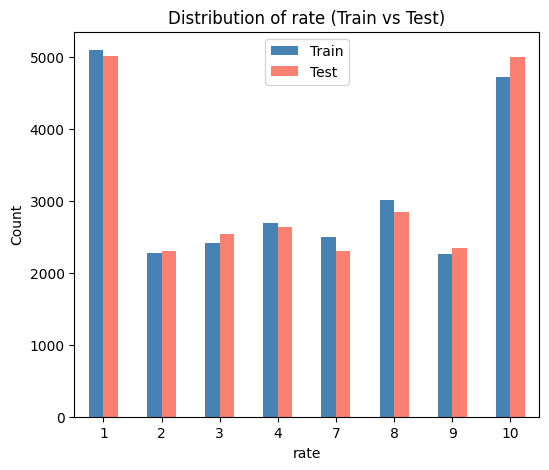

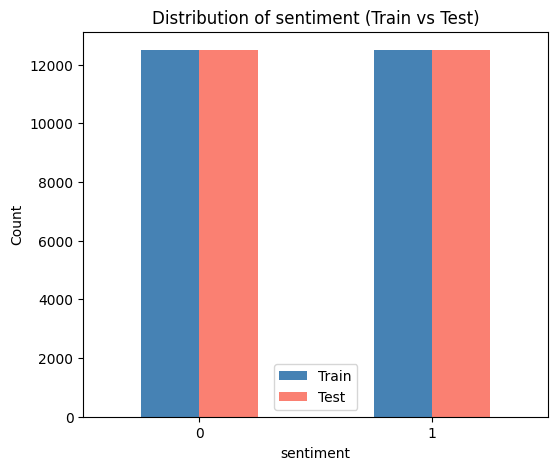

In [13]:
#check train/test distribution

for column in ['rate', 'sentiment']:
    # Plot distribution
    train_counts = df_train[column].value_counts().sort_index()
    test_counts = df_test[column].value_counts().sort_index()

    df_counts = pd.DataFrame({
        'Train': train_counts,
        'Test': test_counts
    })

    df_counts.plot(kind='bar', figsize=(6, 5), title=f'Distribution of {column} (Train vs Test)', color=['steelblue', 'salmon'])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


In [12]:
visualizer_train = DataVisualizer(df_train)
visualizer_test = DataVisualizer(df_test)

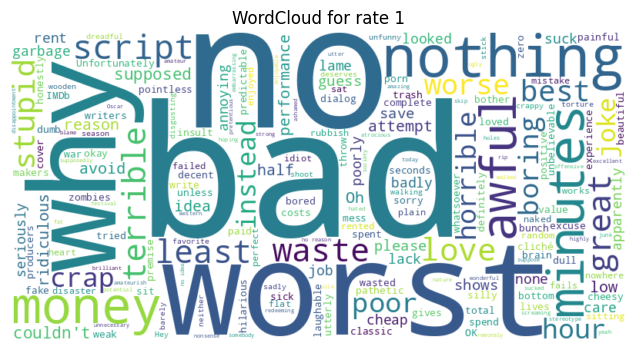

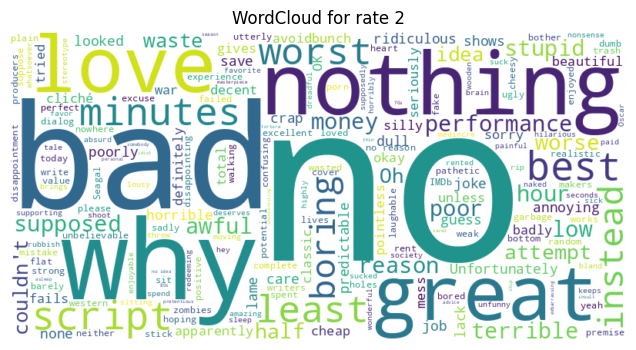

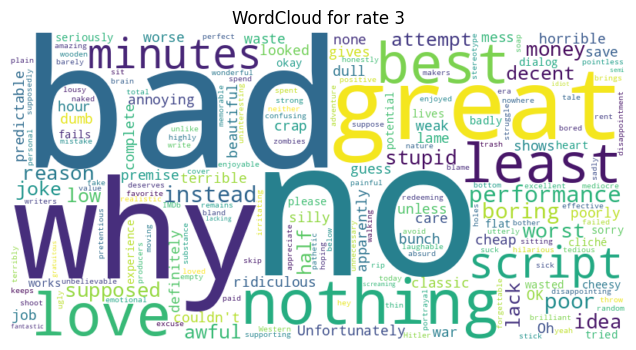

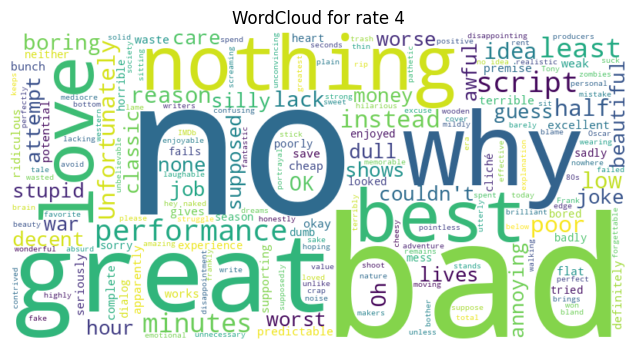

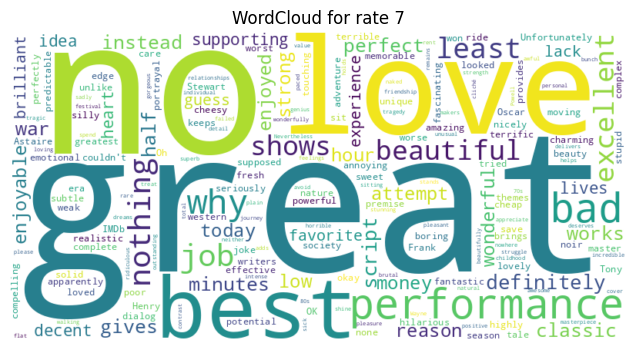

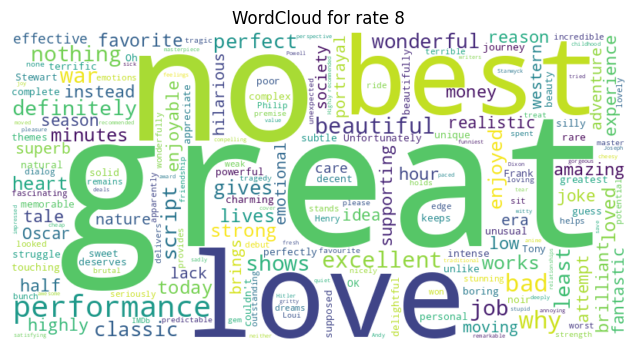

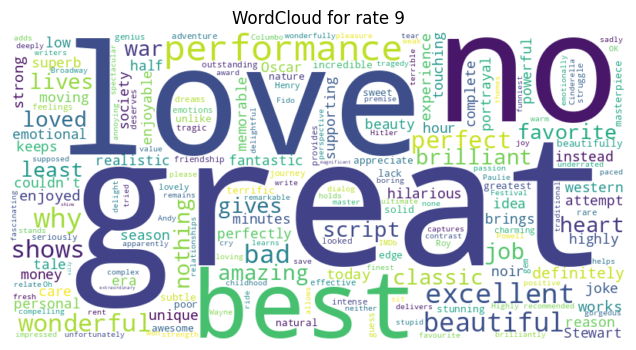

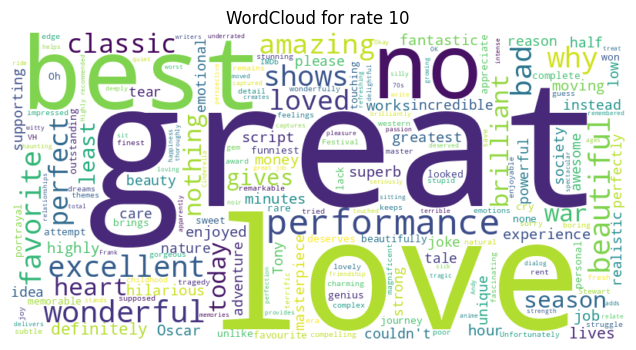

In [13]:
#wordcloud depending on rates
visualizer_train.generate_wordcloud(stopwords=emb_loader.stopwords, col='rate')


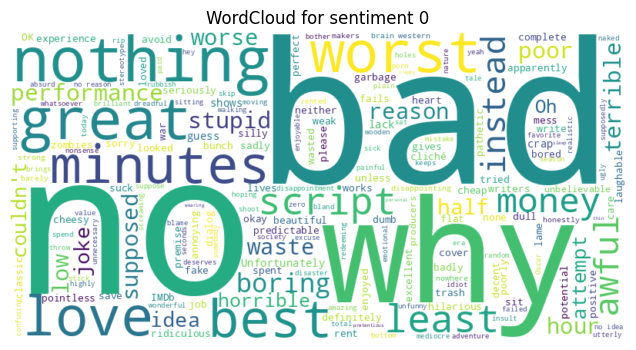

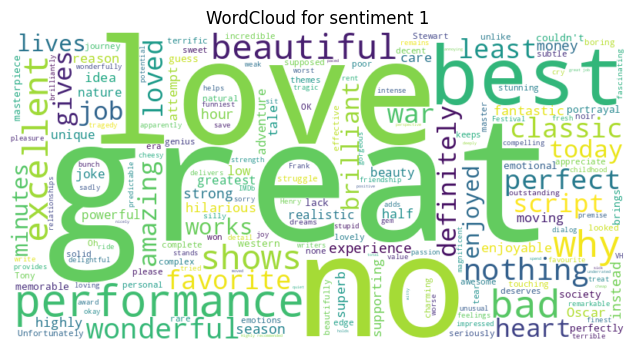

In [14]:
#wordcloud depending on sentiment
visualizer_train.generate_wordcloud(stopwords=emb_loader.stopwords, col='sentiment')

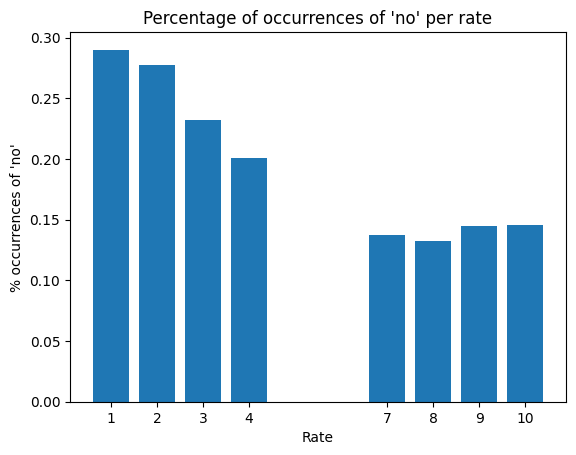

In [15]:
visualizer_train.visualize_word_occurrence(word='no')

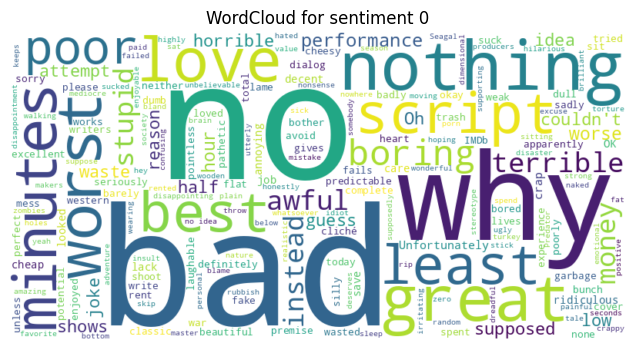

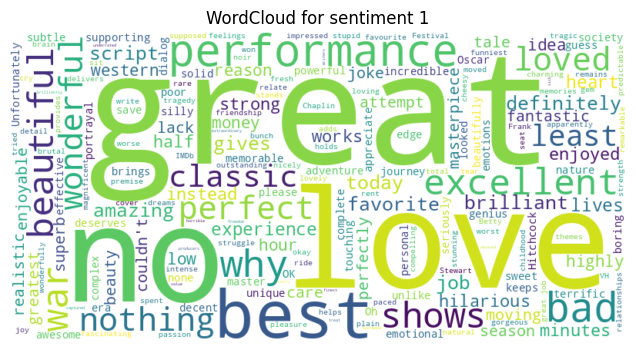

In [16]:
#quick check on test set
visualizer_test.generate_wordcloud(stopwords=emb_loader.stopwords, col='sentiment')